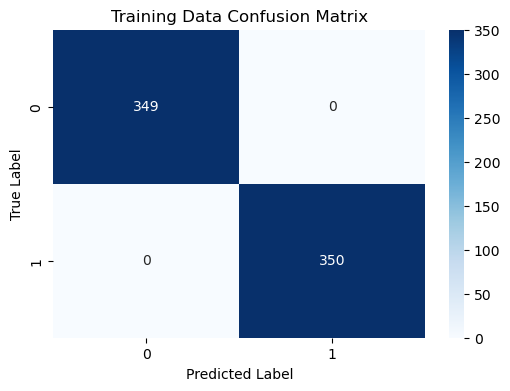

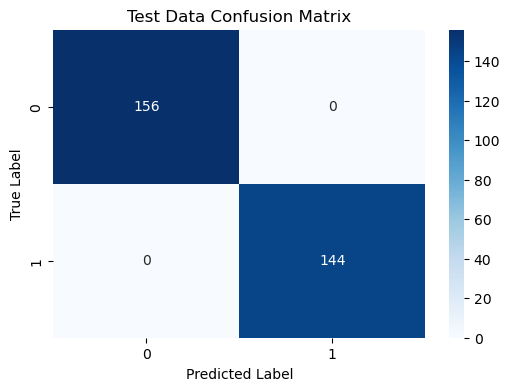

Training Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       350

    accuracy                           1.00       699
   macro avg       1.00      1.00      1.00       699
weighted avg       1.00      1.00      1.00       699

Test Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       156
           1       1.00      1.00      1.00       144

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Training F1-Score: 1.00
Test F1-Score: 1.00
The model seems to be regular fitting (balanced performance on both training and test data).


In [5]:
#QUESTION 1
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
file_path = 'final.xlsx'
df = pd.read_excel(file_path)

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to convert categorical data to numerical data
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save the encoder if you need to reverse the encoding later

# Splitting features and target variable
X = df.iloc[:, :-1]  # Assuming all columns except the last are features
y = df.iloc[:, -1]   # Assuming the last column is the target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a model (RandomForestClassifier used as an example)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate on training data
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred, output_dict=True)

# Evaluate on test data
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred, output_dict=True)

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6,4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(train_conf_matrix, "Training Data Confusion Matrix")
plot_confusion_matrix(test_conf_matrix, "Test Data Confusion Matrix")

# Print classification reports
print("Training Data Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Test Data Classification Report:")
print(classification_report(y_test, y_test_pred))

# Analyze model fit based on training vs test performance
train_f1 = train_report['weighted avg']['f1-score']
test_f1 = test_report['weighted avg']['f1-score']

print(f"Training F1-Score: {train_f1:.2f}")
print(f"Test F1-Score: {test_f1:.2f}")

# Infer the model's learning outcome
if train_f1 > test_f1 + 0.1:
    print("The model is likely overfitting (high performance on training data but lower on test data).")
elif train_f1 < test_f1:
    print("The model might be underfitting (low performance on both training and test data).")
else:
    print("The model seems to be regular fitting (balanced performance on both training and test data).")


In [7]:
#QUESTION 2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'final.xlsx'
df = pd.read_excel(file_path)

# Identify and convert categorical columns to numeric (e.g., using LabelEncoder)
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variable (replace 'price' with your target column)
target_column = 'hair_loss'   # Update this based on your dataset
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model (RandomForestRegressor used as an example)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²) Score: {r2:.2f}")

Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
Mean Absolute Percentage Error (MAPE): 0.00%
R-squared (R²) Score: 1.00


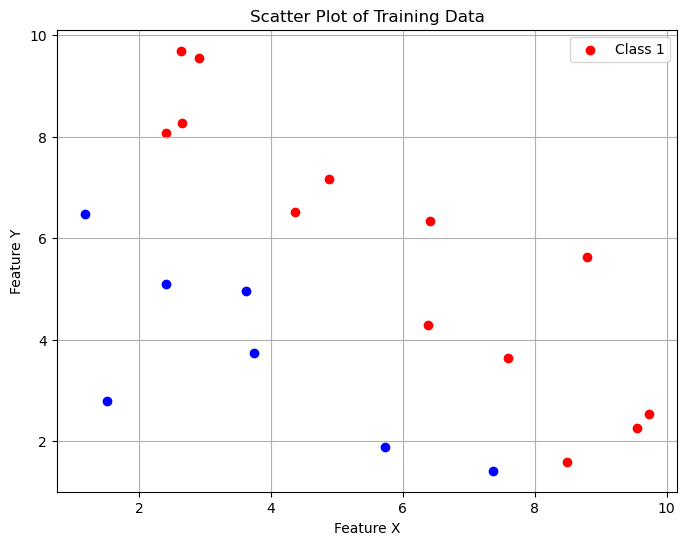

In [9]:
#QUESTION 3
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate 20 random data points for X and Y between 1 and 10
np.random.seed(42)  # For reproducibility
X = np.random.uniform(1, 10, 20)
Y = np.random.uniform(1, 10, 20)

# Step 2: Assign classes based on a simple condition (e.g., X + Y > 10 -> class 1, else class 0)
# You can modify this condition as per your requirements
classes = np.where(X + Y > 10, 1, 0)

# Step 3: Create a scatter plot with different colors for the classes
plt.figure(figsize=(8, 6))
for i in range(len(X)):
    if classes[i] == 0:
        plt.scatter(X[i], Y[i], color='blue', label='Class 0' if i == 0 else "")
    else:
        plt.scatter(X[i], Y[i], color='red', label='Class 1' if i == 0 else "")

# Step 4: Labeling the plot
plt.title('Scatter Plot of Training Data')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.legend()
plt.grid(True)
plt.show()

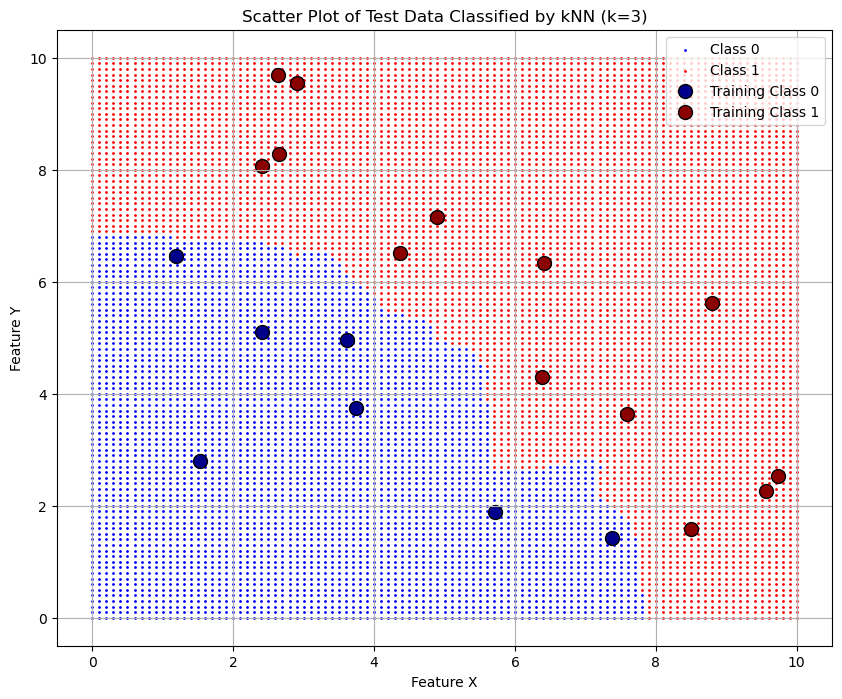

In [11]:
#Question 4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Generate the training data as before
np.random.seed(42)  # For reproducibility
X_train = np.random.uniform(1, 10, 20)
Y_train = np.random.uniform(1, 10, 20)
train_classes = np.where(X_train + Y_train > 10, 1, 0)

# Combine X and Y into a single array for training
train_data = np.column_stack((X_train, Y_train))

# Step 2: Generate the test data with X and Y ranging from 0 to 10 in increments of 0.1
x_test_range = np.arange(0, 10.1, 0.1)
y_test_range = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_test_range, y_test_range)
X_test_flat = X_test.flatten()
Y_test_flat = Y_test.flatten()

# Combine X and Y into a single array for testing
test_data = np.column_stack((X_test_flat, Y_test_flat))

# Step 3: Train the kNN classifier (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data, train_classes)

# Step 4: Predict the classes of the test data
test_classes_pred = knn.predict(test_data)

# Step 5: Make a scatter plot of the test data with points colored by their predicted class
plt.figure(figsize=(10, 8))
plt.scatter(X_test_flat[test_classes_pred == 0], Y_test_flat[test_classes_pred == 0], 
            color='blue', s=1, label='Class 0')
plt.scatter(X_test_flat[test_classes_pred == 1], Y_test_flat[test_classes_pred == 1], 
            color='red', s=1, label='Class 1')

# Step 6: Plot the training data points as well for reference
plt.scatter(X_train[train_classes == 0], Y_train[train_classes == 0], 
            color='darkblue', edgecolor='k', s=100, label='Training Class 0')
plt.scatter(X_train[train_classes == 1], Y_train[train_classes == 1], 
            color='darkred', edgecolor='k', s=100, label='Training Class 1')

# Step 7: Labeling the plot
plt.title('Scatter Plot of Test Data Classified by kNN (k=3)')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.legend()
plt.grid(True)
plt.show()

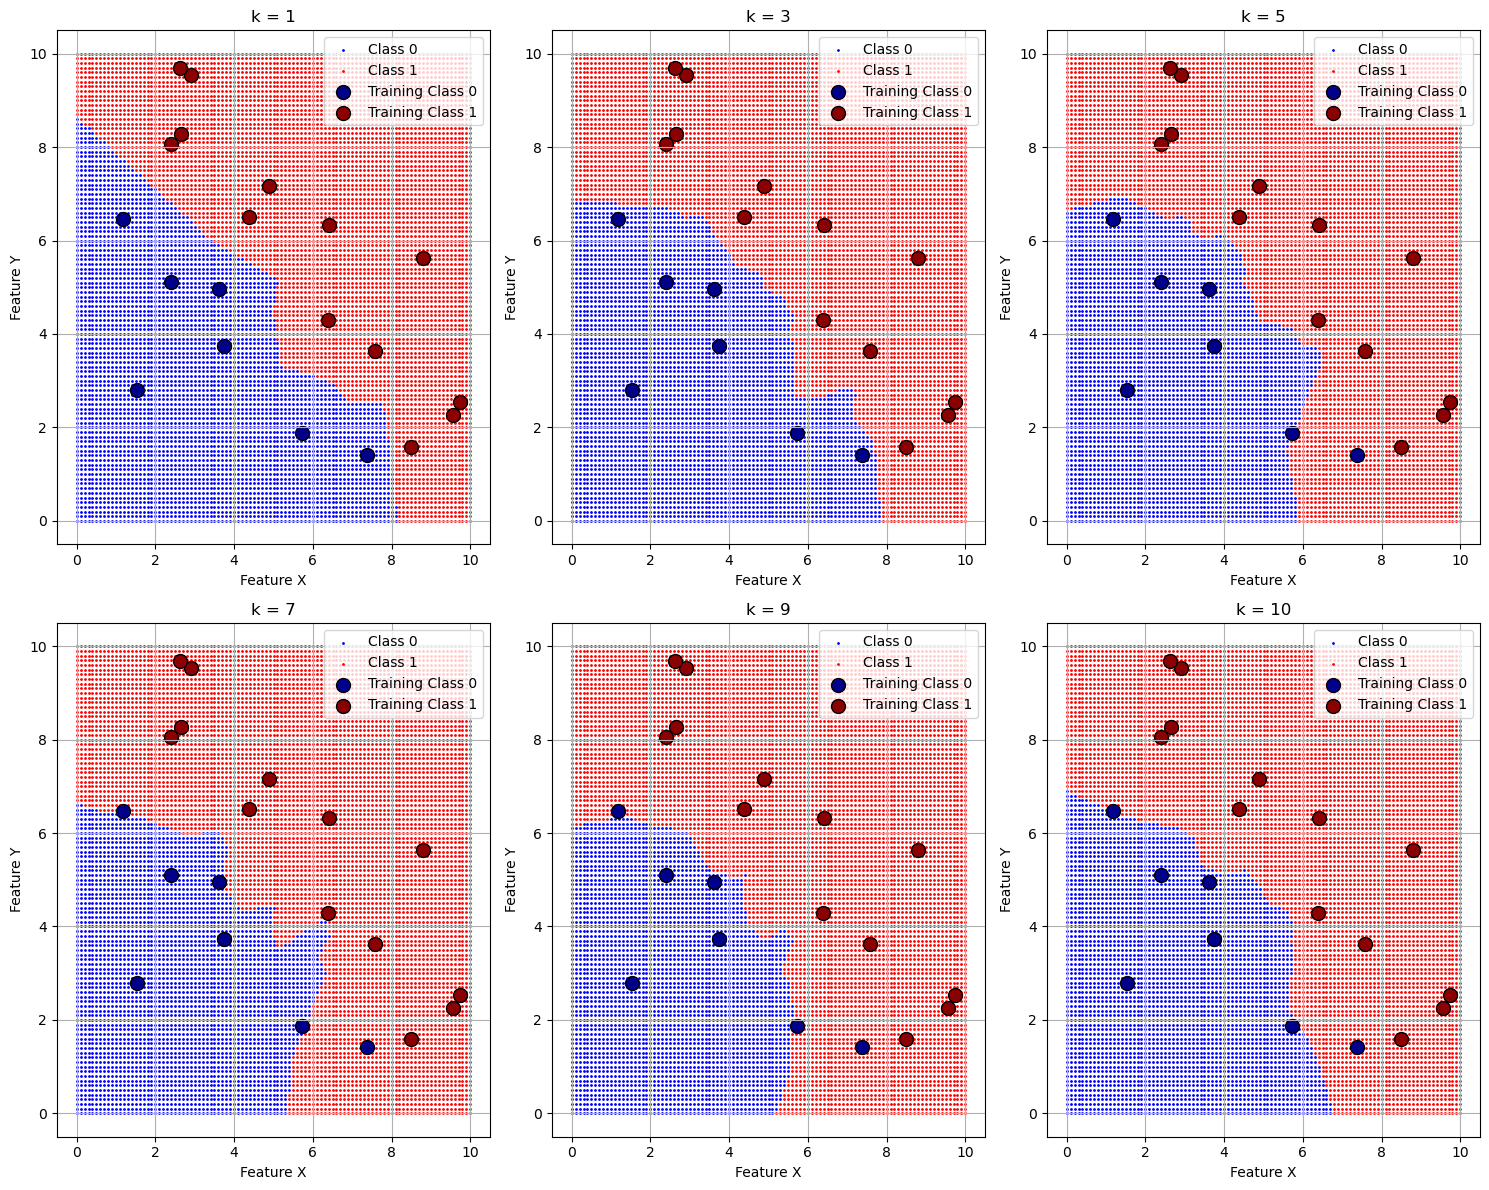

In [15]:
#Question 4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Generate the training data as before
np.random.seed(42)
X_train = np.random.uniform(1, 10, 20)
Y_train = np.random.uniform(1, 10, 20)
train_classes = np.where(X_train + Y_train > 10, 1, 0)

# Combine X and Y into a single array for training
train_data = np.column_stack((X_train, Y_train))

# Generate the test data with X and Y ranging from 0 to 10 in increments of 0.1
x_test_range = np.arange(0, 10.1, 0.1)
y_test_range = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_test_range, y_test_range)
X_test_flat = X_test.flatten()
Y_test_flat = Y_test.flatten()

# Combine X and Y into a single array for testing
test_data = np.column_stack((X_test_flat, Y_test_flat))

# Define a list of k values to test
k_values = [1, 3, 5, 7, 9, 10]

# Plotting the class boundaries for each k value
plt.figure(figsize=(15, 12))
for idx, k in enumerate(k_values, start=1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, train_classes)
    
    # Predict the classes of the test data
    test_classes_pred = knn.predict(test_data)
    
    # Create a subplot for each k value
    plt.subplot(2, 3, idx)
    plt.scatter(X_test_flat[test_classes_pred == 0], Y_test_flat[test_classes_pred == 0], 
                color='blue', s=1, label='Class 0')
    plt.scatter(X_test_flat[test_classes_pred == 1], Y_test_flat[test_classes_pred == 1], 
                color='red', s=1, label='Class 1')
    
    # Plot the training data points as well for reference
    plt.scatter(X_train[train_classes == 0], Y_train[train_classes == 0], 
                color='darkblue', edgecolor='k', s=100, label='Training Class 0')
    plt.scatter(X_train[train_classes == 1], Y_train[train_classes == 1], 
                color='darkred', edgecolor='k', s=100, label='Training Class 1')
    
    plt.title(f'k = {k}')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

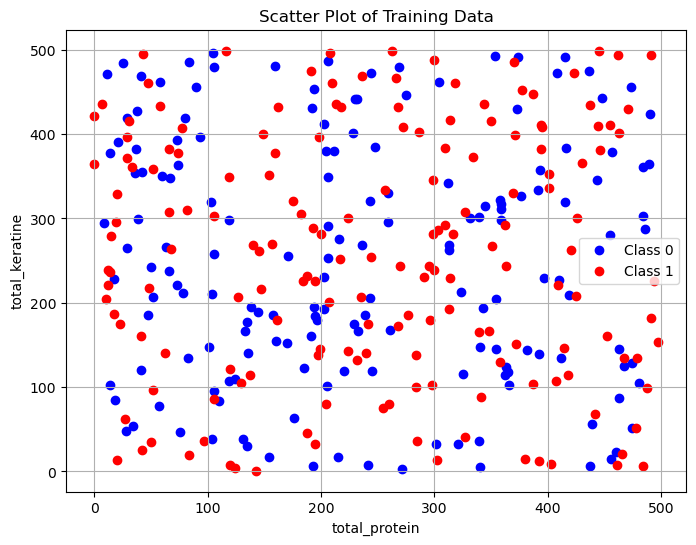

In [35]:
#OUESTION 6
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_excel('final.xlsx')  # Load your dataset

# Select two features and two classes (modify feature names and class labels as per your dataset)
feature1 = 'total_protein'  # Replace with your feature name
feature2 = 'total_keratine'  # Replace with your feature name
class_column = 'hair_heatlh'  # Replace with your class column name
# Filter the data to contain only two classes
df = df[df[class_column].isin([0, 1])]  # Assuming classes are labeled 0 and 1

# Extract features and classes
X = df[[feature1, feature2]].values
y = df[class_column].values

# Create a scatter plot of the training data
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Scatter Plot of Training Data')
plt.legend()
plt.grid(True)
plt.show()

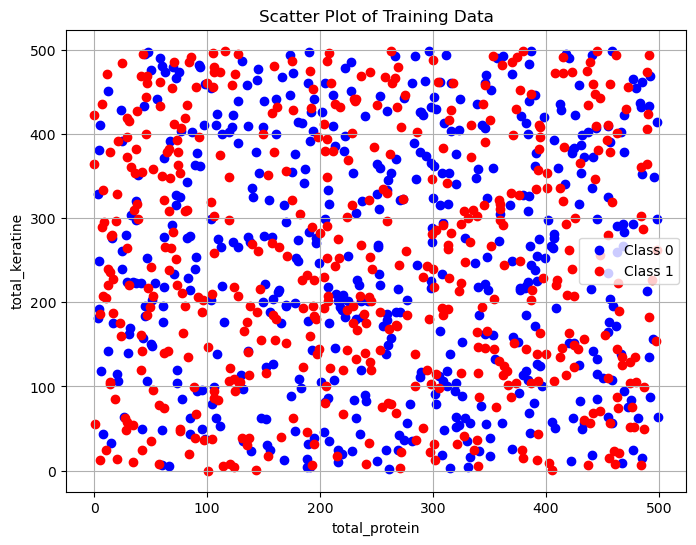

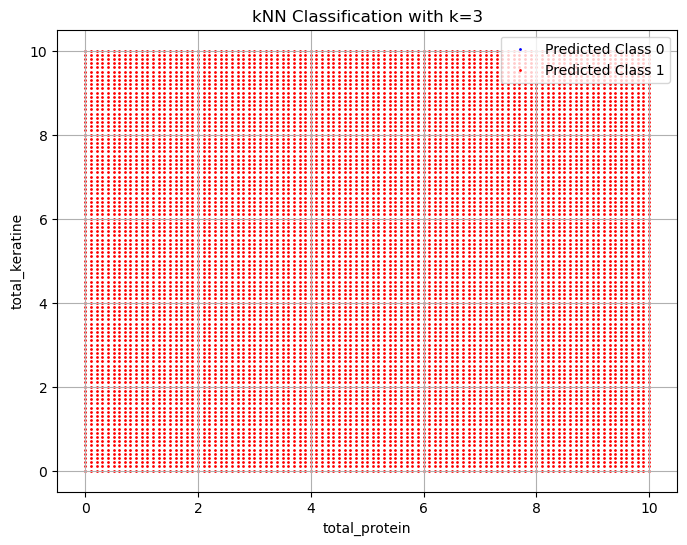

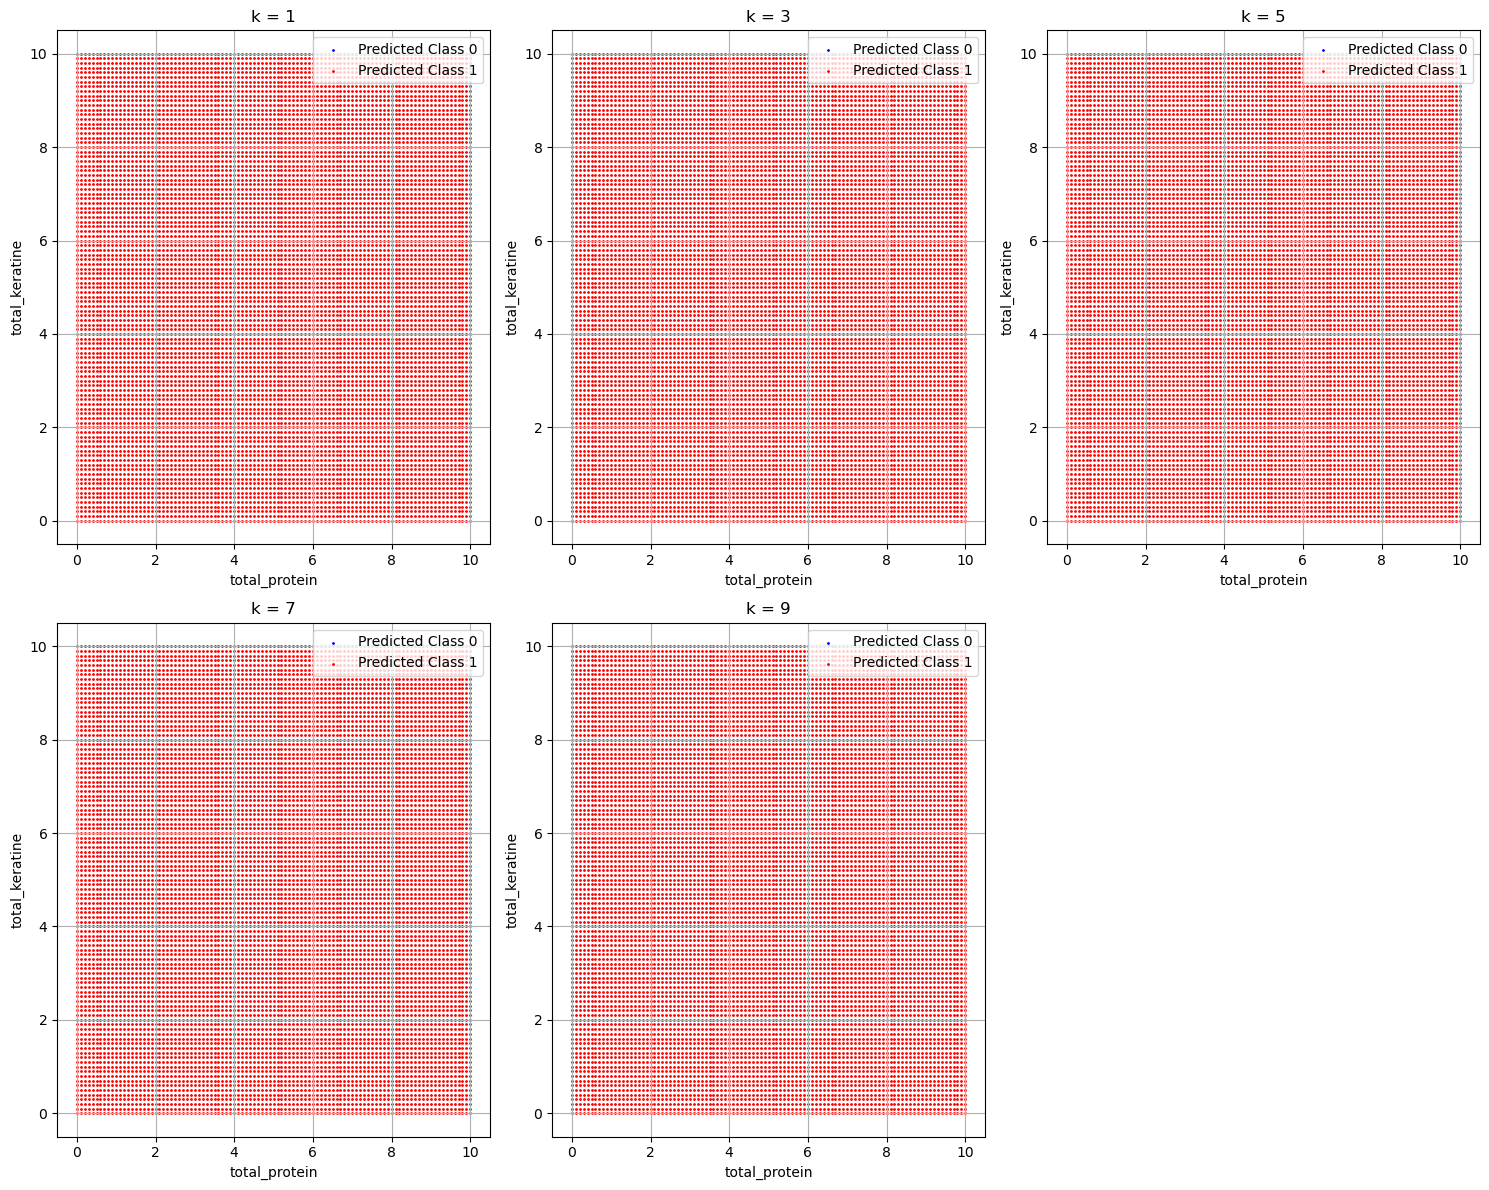

In [37]:
#QUESTION 6 continue
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_excel('final.xlsx')  # Load your dataset

# Select two features and two classes (modify feature names and class labels as per your dataset)
feature1 = 'total_protein'  # Replace with your feature name
feature2 = 'total_keratine'  # Replace with your feature name
class_column = 'hair_loss'  # Replace with your class column name

# Filter the data to contain only two classes
df = df[df[class_column].isin([0, 1])]  # Assuming classes are labeled 0 and 1

# Extract features and classes
X = df[[feature1, feature2]].values
y = df[class_column].values

# Create a scatter plot of the training data
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Scatter Plot of Training Data')
plt.legend()
plt.grid(True)
plt.show()

#A4
from sklearn.neighbors import KNeighborsClassifier

# Generate test data
x_test_range = np.arange(0, 10.1, 0.1)
y_test_range = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_test_range, y_test_range)
X_test_flat = X_test.flatten()
Y_test_flat = Y_test.flatten()
test_data = np.column_stack((X_test_flat, Y_test_flat))

# Train kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Predict the classes of the test data
test_classes_pred = knn.predict(test_data)

# Scatter plot of the test data colored by predicted class
plt.figure(figsize=(8, 6))
plt.scatter(X_test_flat[test_classes_pred == 0], Y_test_flat[test_classes_pred == 0], 
            color='blue', s=1, label='Predicted Class 0')
plt.scatter(X_test_flat[test_classes_pred == 1], Y_test_flat[test_classes_pred == 1], 
            color='red', s=1, label='Predicted Class 1')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('kNN Classification with k=3')
plt.legend()
plt.grid(True)
plt.show()

#A5
# Define a list of k values to test
k_values = [1, 3, 5, 7, 9]

# Plotting the class boundaries for each k value
plt.figure(figsize=(15, 12))
for idx, k in enumerate(k_values, start=1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    
    # Predict the classes of the test data
    test_classes_pred = knn.predict(test_data)
    
    # Create a subplot for each k value
    plt.subplot(2, 3, idx)
    plt.scatter(X_test_flat[test_classes_pred == 0], Y_test_flat[test_classes_pred == 0], 
                color='blue', s=1, label='Predicted Class 0')
    plt.scatter(X_test_flat[test_classes_pred == 1], Y_test_flat[test_classes_pred == 1], 
                color='red', s=1, label='Predicted Class 1')
    
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'k = {k}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [43]:
#QUESTION7
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_excel('final.xlsx')  # Load your dataset

# Replace with your actual feature and class column names
feature1 = 'total_protein'  # Corrected column name
feature2 = 'total_keratine'  # Replace with your feature name
class_column = 'hair_heatlh'  # Replace with your class column name

# Check if columns exist
if feature1 not in df.columns or feature2 not in df.columns or class_column not in df.columns:
    print("Error: One or more columns not found in the dataset.")
else:
    # Filter the data to contain only two classes
    df = df[df[class_column].isin([0, 1])]  # Assuming classes are labeled 0 and 1

    # Extract features and classes
    X = df[[feature1, feature2]].values
    y = df[class_column].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Define the parameter grid for 'k'
    param_grid = {'n_neighbors': list(range(1, 31))}

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best parameter (k) and evaluate the model
    best_k = grid_search.best_params_['n_neighbors']
    print(f"Best k value: {best_k}")

    # Train the kNN classifier with the best k
    best_knn = KNeighborsClassifier(n_neighbors=best_k)
    best_knn.fit(X_train, y_train)

    # Evaluate the model
    y_pred_train = best_knn.predict(X_train)
    y_pred_test = best_knn.predict(X_test)

    print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
    print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

    print("\nClassification Report for Training Data:")
    print(classification_report(y_train, y_pred_train))

    print("\nClassification Report for Test Data:")
    print(classification_report(y_test, y_pred_test))


Best k value: 1
Training Accuracy: 1.0
Test Accuracy: 0.47058823529411764

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00       124

    accuracy                           1.00       236
   macro avg       1.00      1.00      1.00       236
weighted avg       1.00      1.00      1.00       236


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.50      0.46      0.48        54
           1       0.44      0.48      0.46        48

    accuracy                           0.47       102
   macro avg       0.47      0.47      0.47       102
weighted avg       0.47      0.47      0.47       102

